<a href="https://colab.research.google.com/github/AI4Finance-Foundation/FinRL/blob/master/tutorials/3-Practical/FinRL_PaperTrading_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from finrl.train import train
from finrl.test import test
from finrl.config_tickers import DOW_30_TICKER
from finrl.config import INDICATORS
from finrl.meta.env_stock_trading.env_stocktrading_np import StockTradingEnv
from finrl.meta.env_stock_trading.env_stock_papertrading import AlpacaPaperTrading
from finrl.meta.data_processor import DataProcessor
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from common import *

import numpy as np
import pandas as pd

/home/quantumiracle/anaconda3/envs/x/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [4]:
ticker_list = DOW_30_TICKER
action_dim = len(DOW_30_TICKER)
candle_time_interval = '1Min'  # '1Min'

env = StockTradingEnv

start_date = '2022-6-1'
end_date = '2022-6-3'

In [5]:
account_value = test(start_date = start_date, 
      end_date = end_date,
      ticker_list = ticker_list, 
      data_source = 'alpaca',
      time_interval= candle_time_interval, 
      technical_indicator_list= INDICATORS,
      drl_lib='elegantrl', 
      env=env,
      model_name='ppo', 
      API_KEY = API_KEY, 
      API_SECRET = API_SECRET, 
      API_BASE_URL = API_BASE_URL,
#       erl_params=ERL_PARAMS,
      cwd='./papertrading_erl', #current_working_dir
      if_plot=True, # to return a dataframe for backtest_plot
      break_step=1e7)

Alpaca successfully connected
Load data from data/alpaca_2022-6-1_2022-6-3.pkl
The data looks like: 
                    timestamp     open      high      low     close     volume  \
0  2022-06-01 09:30:00-04:00  149.910  150.4000  149.880  150.1200  1368498.0   
1  2022-06-01 09:30:00-04:00  257.880  257.9700  255.510  256.7200    75245.0   
2  2022-06-01 09:30:00-04:00  169.680  169.6800  168.700  169.1100    49897.0   
3  2022-06-01 09:30:00-04:00  133.200  133.8800  132.330  133.6300   145791.0   
4  2022-06-01 09:30:00-04:00  218.460  218.4600  217.000  217.4900    48460.0   
5  2022-06-01 09:30:00-04:00  178.700  179.5100  178.010  179.1500   709696.0   
6  2022-06-01 09:30:00-04:00   45.540   45.5800   45.390   45.5400   564031.0   
7  2022-06-01 09:30:00-04:00  176.720  177.0800  176.660  176.9700     9277.0   
8  2022-06-01 09:30:00-04:00  112.080  112.1400  111.460  111.6300    15076.0   
9  2022-06-01 09:30:00-04:00   68.650   68.8590   68.570   68.6100   164577.0   
10 2022

/home/quantumiracle/research/FinRL/finrl/agents/elegantrl/models.py:110: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  s_tensor = _torch.as_tensor((state,), device=device)


Test Finished!
episode_return 1.0054273366498567


In [6]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI", 
        start = start_date,
        end = end_date)

stats = backtest_stats(baseline_df, value_col_name = 'close')

==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (2, 8)
Annual return          4.257104
Cumulative returns     0.013258
Annual volatility           NaN
Sharpe ratio                NaN
Calmar ratio                NaN
Stability              0.000000
Max drawdown           0.000000
Omega ratio                 NaN
Sortino ratio               inf
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.000000
Daily value at risk         NaN
dtype: float64


/home/quantumiracle/anaconda3/envs/x/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/quantumiracle/anaconda3/envs/x/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/quantumiracle/anaconda3/envs/x/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/quantumiracle/anaconda3/envs/x/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/quantumiracle/anaconda3/envs/x/lib/python3.7/site-packages/empyrical/stats.py:799: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, 

==============Compare to DJIA===========
date 2
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (2, 8)


/home/quantumiracle/anaconda3/envs/x/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/quantumiracle/anaconda3/envs/x/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/quantumiracle/anaconda3/envs/x/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/quantumiracle/anaconda3/envs/x/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/quantumiracle/anaconda3/envs/x/lib/python3.7/site-packages/empyrical/stats.py:799: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, 

Start date,2022-06-01
End date,2022-06-02
Total months,0
,Backtest
Annual return,934.376%
Cumulative returns,1.872%
Annual volatility,nan%
Sharpe ratio,NaN
Calmar ratio,NaN
Stability,0.00
Max drawdown,0.0%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,0.00,2022-06-01,2022-06-01,2022-06-01,1
1,NaN,NaT,NaT,NaT,NaN
2,NaN,NaT,NaT,NaT,NaN
3,NaN,NaT,NaT,NaT,NaN
4,NaN,NaT,NaT,NaT,NaN


/home/quantumiracle/anaconda3/envs/x/lib/python3.7/site-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


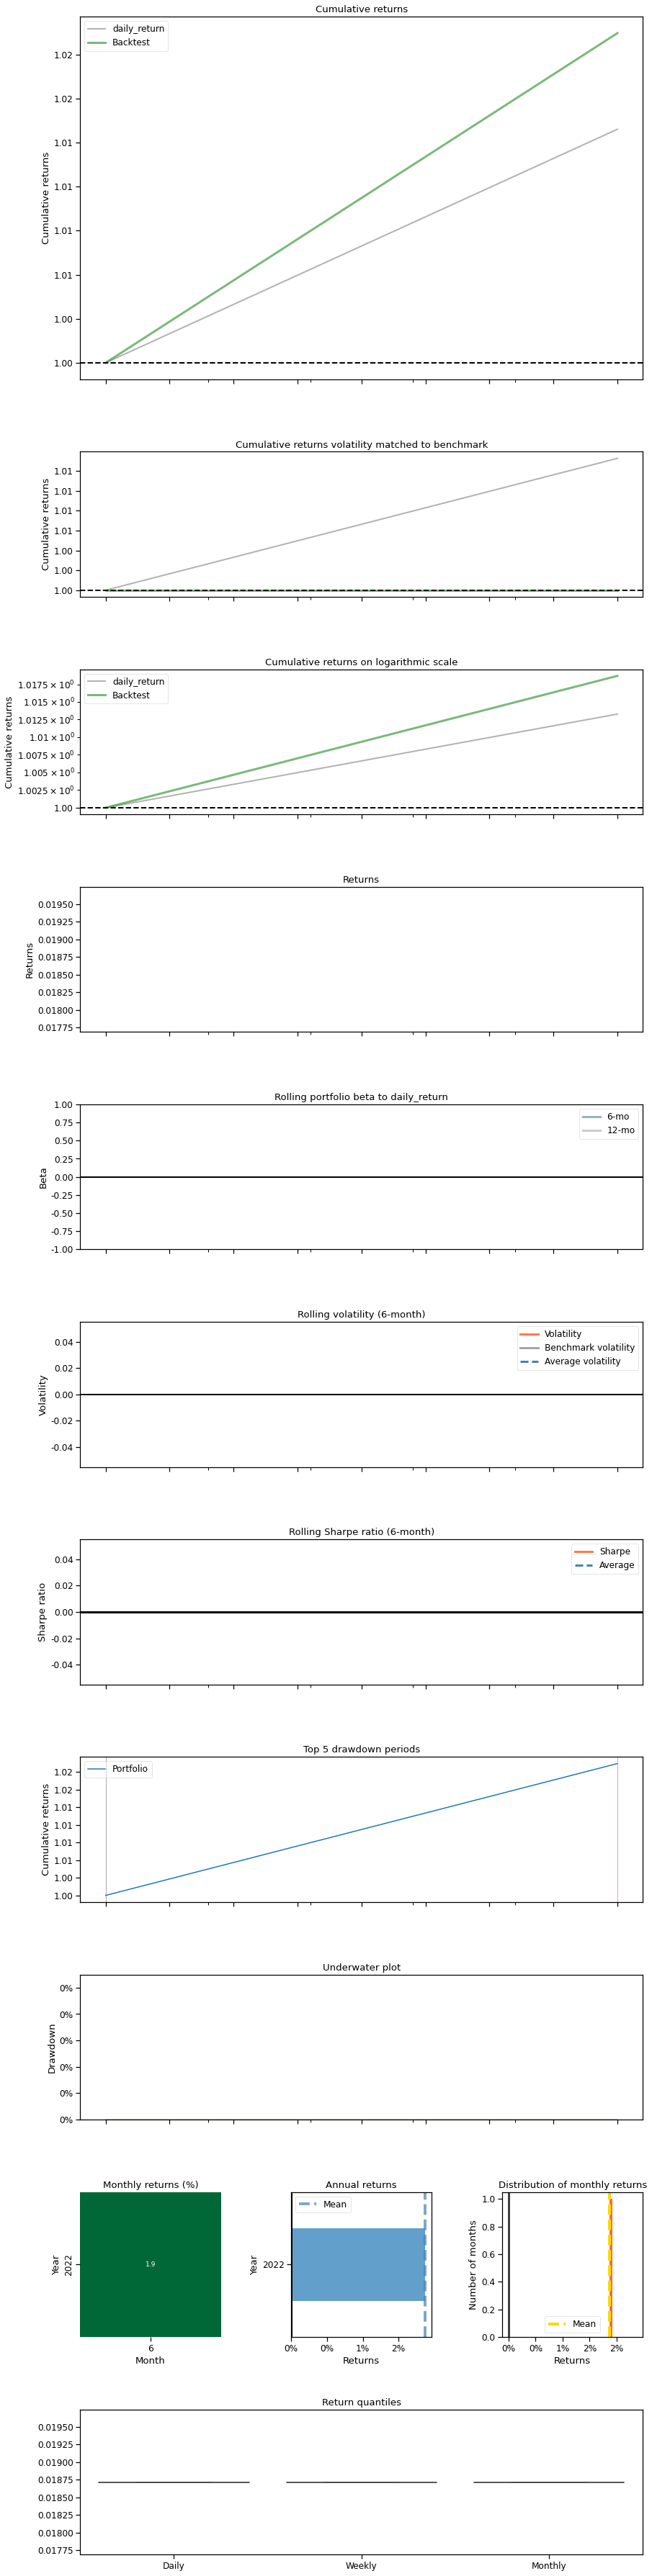

In [7]:
print("==============Compare to DJIA===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot(account_value, 
             baseline_ticker = '^DJI', 
             baseline_start = start_date,
             baseline_end = end_date)